# What does the Titanic dataset tell us about the survivors?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
# Renamed 'Pclass' to 'Class'
df.rename(columns = {"Pclass": "Class"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Class                    887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
df = df.drop(columns = ["Siblings/Spouses Aboard", "Parents/Children Aboard"])
df

,Survived,Class,Name,Sex,Age,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,8.0500
...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,30.0000


## There were 887 passengers on the Titanic
### The oldest passengers were 80 years old with the youngest being less than a year old

In [5]:
summary = df.describe()
summary[["Age", "Fare"]]

,Age,Fare
count,887.000000,887.00000
mean,29.471443,32.30542
std,14.121908,49.78204
min,0.420000,0.00000
25%,20.250000,7.92500
50%,28.000000,14.45420
75%,38.000000,31.13750
max,80.000000,512.32920


## There was a stark difference in the fare prices paid 
### Some paid the maximum of £512.33 whilst 15 people had a free ticket
### The free riders were ALL men

In [6]:
free_fare = df[df["Fare"] == 0]
free_fare = free_fare.sort_values(by = ["Class", "Age"])
free_fare

,Survived,Class,Name,Sex,Age,Fare
630,0,1,Mr. William Henry Marsh Parr,male,30.0,0.0
818,0,1,Jonkheer. John George Reuchlin,male,38.0,0.0
802,0,1,Mr. Thomas Jr Andrews,male,39.0,0.0
811,0,1,Mr. Richard Fry,male,39.0,0.0
261,0,1,Mr. William Harrison,male,40.0,0.0
671,0,2,Mr. Ennis Hastings Watson,male,19.0,0.0
275,0,2,Mr. Francis Parkes,male,21.0,0.0
463,0,2,Mr. William Campbell,male,21.0,0.0
411,0,2,Mr. Alfred Fleming Cunningham,male,22.0,0.0
478,0,2,Mr. Anthony Wood Frost,male,37.0,0.0


In [21]:
ffc = df[(df["Class"] ==  1) & (df["Fare"] == 0)]
ffc = len(ffc.index)
fsc = df[(df["Class"] ==  2) & (df["Fare"] == 0)]
fsc = len(fsc.index)
ftc = df[(df["Class"] ==  3) & (df["Fare"] == 0)]
ftc = len(ftc.index)

### Most of them got free 2nd class tickets

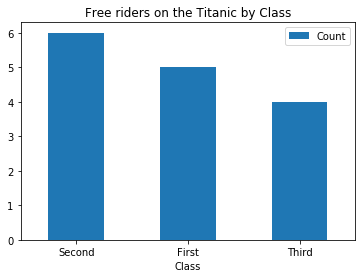

In [25]:
data = {"Class": ["First", "Second", "Third"], "Count": [ffc, fsc, ftc]}
fr = pd.DataFrame(data)
fr = fr.sort_values(by = "Count", ascending = 0)

fr.plot.bar(x = "Class", y = "Count", title = "Free riders on the Titanic by Class", rot = 0)

### But, Mr William Tornquist was the only free rider to survive

In [7]:
man = df.loc[(df["Name"] == "Mr. William Henry Tornquist")]
man

,Survived,Class,Name,Sex,Age,Fare
269,1,3,Mr. William Henry Tornquist,male,25.0,0.0


## There were 573 men and 314 women on board the Titanic
### However, only 109 men and 233 women survived

In [30]:
# finding the total for men and womn
m = df[df["Sex"] == "male"]
males = len(m.index)
f = df[df["Sex"] == "female"]
females = len(f.index)

# finding the number of SURVIVED passengers
sm = df[(df["Sex"] == "male") & (df["Survived"] == 1)]
smales = len(sm.index)
sf = df[(df["Sex"] == "female") & (df["Survived"] == 1)]
sfemales = len(sf.index)

# creating the dataframe
data = {"Gender": ["Men", "Women"], "Total": [males, females],"Survived": [smales, sfemales]}
g = pd.DataFrame(data)

pct_diff = ((g["Total"] - g["Survived"])/ g["Total"]) * 100
g["% Fatalities"] = pct_diff

gender = g

In [29]:
gender

,Gender,Total,Survived,% Fatalities
0,Men,573,109,80.977312
1,Women,314,233,25.796178


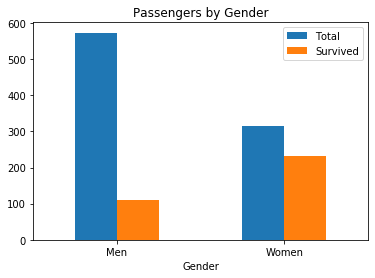

In [10]:
gender.plot.bar(x = "Gender", y = ["Total", "Survived"], title = "Passengers by Gender", rot = 0)

### The majority of passengers were in 3rd class but most survivors were from 1st class

In [11]:
# finding the total number of passengers in each class
first = df[df["Class"] == 1]
tfc = len(first.index)

second = df[df["Class"] == 2]
tsc = len(second.index)

third = df[df["Class"] == 3]
ttc = len(third.index)

# finding the number of survived passengers by class
first = df[(df["Class"] == 1) & (df["Survived"] == 1)]
sfc = len(first.index)

second = df[(df["Class"] == 2) & (df["Survived"] == 1)]
ssc = len(second.index)

third = df[(df["Class"] == 3) & (df["Survived"] == 1)]
stc = len(third.index)

In [26]:
data = {"Class": ["First", "Second", "Third"], "Survived": [sfc, ssc, stc], "Total": [tfc, tsc, ttc]}
pc = pd.DataFrame(data)

# sorting the data by passenger count
pc = pc.sort_values(by = ["Survived"], ascending = 0)
pc

,Class,Survived,Total
0,First,136,216
2,Third,119,487
1,Second,87,184


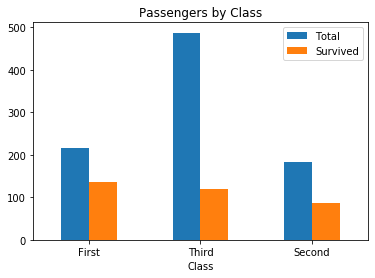

In [27]:
pc.plot.bar(x = "Class", y = ["Total", "Survived"], title = "Passengers by Class", rot = 0)

## So far we've seen that a woman in first-class had the highest chance of survival
### What age would she have been?

In [14]:
women = df[(df["Sex"] == "female") & (df["Class"] == 1) & (df["Survived"] == 1)]

In [15]:
age = women.describe()
age["Age"]

count    91.000000
mean     35.571429
std      12.870416
min      14.000000
25%      24.000000
50%      35.000000
75%      44.500000
max      63.000000
Name: Age, dtype: float64

## We can conclude that the average survivor was a 36 year old woman in first-class
#### ...such as Miss Young, Miss Crosby and Mrs Carter

In [16]:
avg_woman = df.loc[(df["Class"] == 1) & (df["Sex"] == "female") & (df["Age"] == 36)]
avg_woman

,Survived,Class,Name,Sex,Age,Fare
323,1,1,Miss. Marie Grice Young,female,36.0,135.6333
537,1,1,Miss. Harriet R Crosby,female,36.0,71.0000
759,1,1,Mrs. William Ernest (Lucile Polk) Carter,female,36.0,120.0000


## Conversely, a 2nd class 33 year old man was least likely to survive the tragedy

In [17]:
men = df[(df["Sex"] == "male") & (df["Class"] == 2) & (df["Survived"] == 0)]
age = men.describe()
age["Age"]

count    91.000000
mean     33.000000
std      12.019198
min      16.000000
25%      24.000000
50%      30.000000
75%      39.000000
max      70.000000
Name: Age, dtype: float64

#### ...such as Mr George Henry Hunt

In [18]:
avg_man = df.loc[(df["Class"] == 2) & (df["Sex"] == "male") & (df["Age"] == 33)]
avg_man

,Survived,Class,Name,Sex,Age,Fare
238,0,2,Mr. George Henry Hunt,male,33.0,12.275
